In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("skin_TXK6Z4X_A1_16um_horizontal_non_random.csv", index_col=0)

df.drop(columns=["colour", "PANEL", "group", "fill", "linewidth", "linetype", "weight", "alpha", "flipped_aes"], axis=1, inplace=True)

df["variables"] = df["variables"].astype(str)

df.to_csv("skin_TXK6Z4X_A1_16um_horizontal_non_random.csv")
df

,x,y,ymin,ymax,se,variables
1,0.037010,0.012434,-0.056492,0.081359,0.035053,CST3
2,0.117961,0.006235,-0.045692,0.058163,0.026409,CST3
3,0.198912,0.002227,-0.036848,0.041302,0.019872,CST3
4,0.279863,0.000419,-0.030513,0.031350,0.015731,CST3
5,0.360814,0.000816,-0.026508,0.028140,0.013896,CST3
...,...,...,...,...,...,...
3996,6.108334,0.509848,0.488108,0.531588,0.011056,S100A8
3997,6.189285,0.494942,0.473105,0.516779,0.011106,S100A8
3998,6.270236,0.472218,0.446937,0.497498,0.012857,S100A8
3999,6.351187,0.440671,0.406990,0.474353,0.017129,S100A8


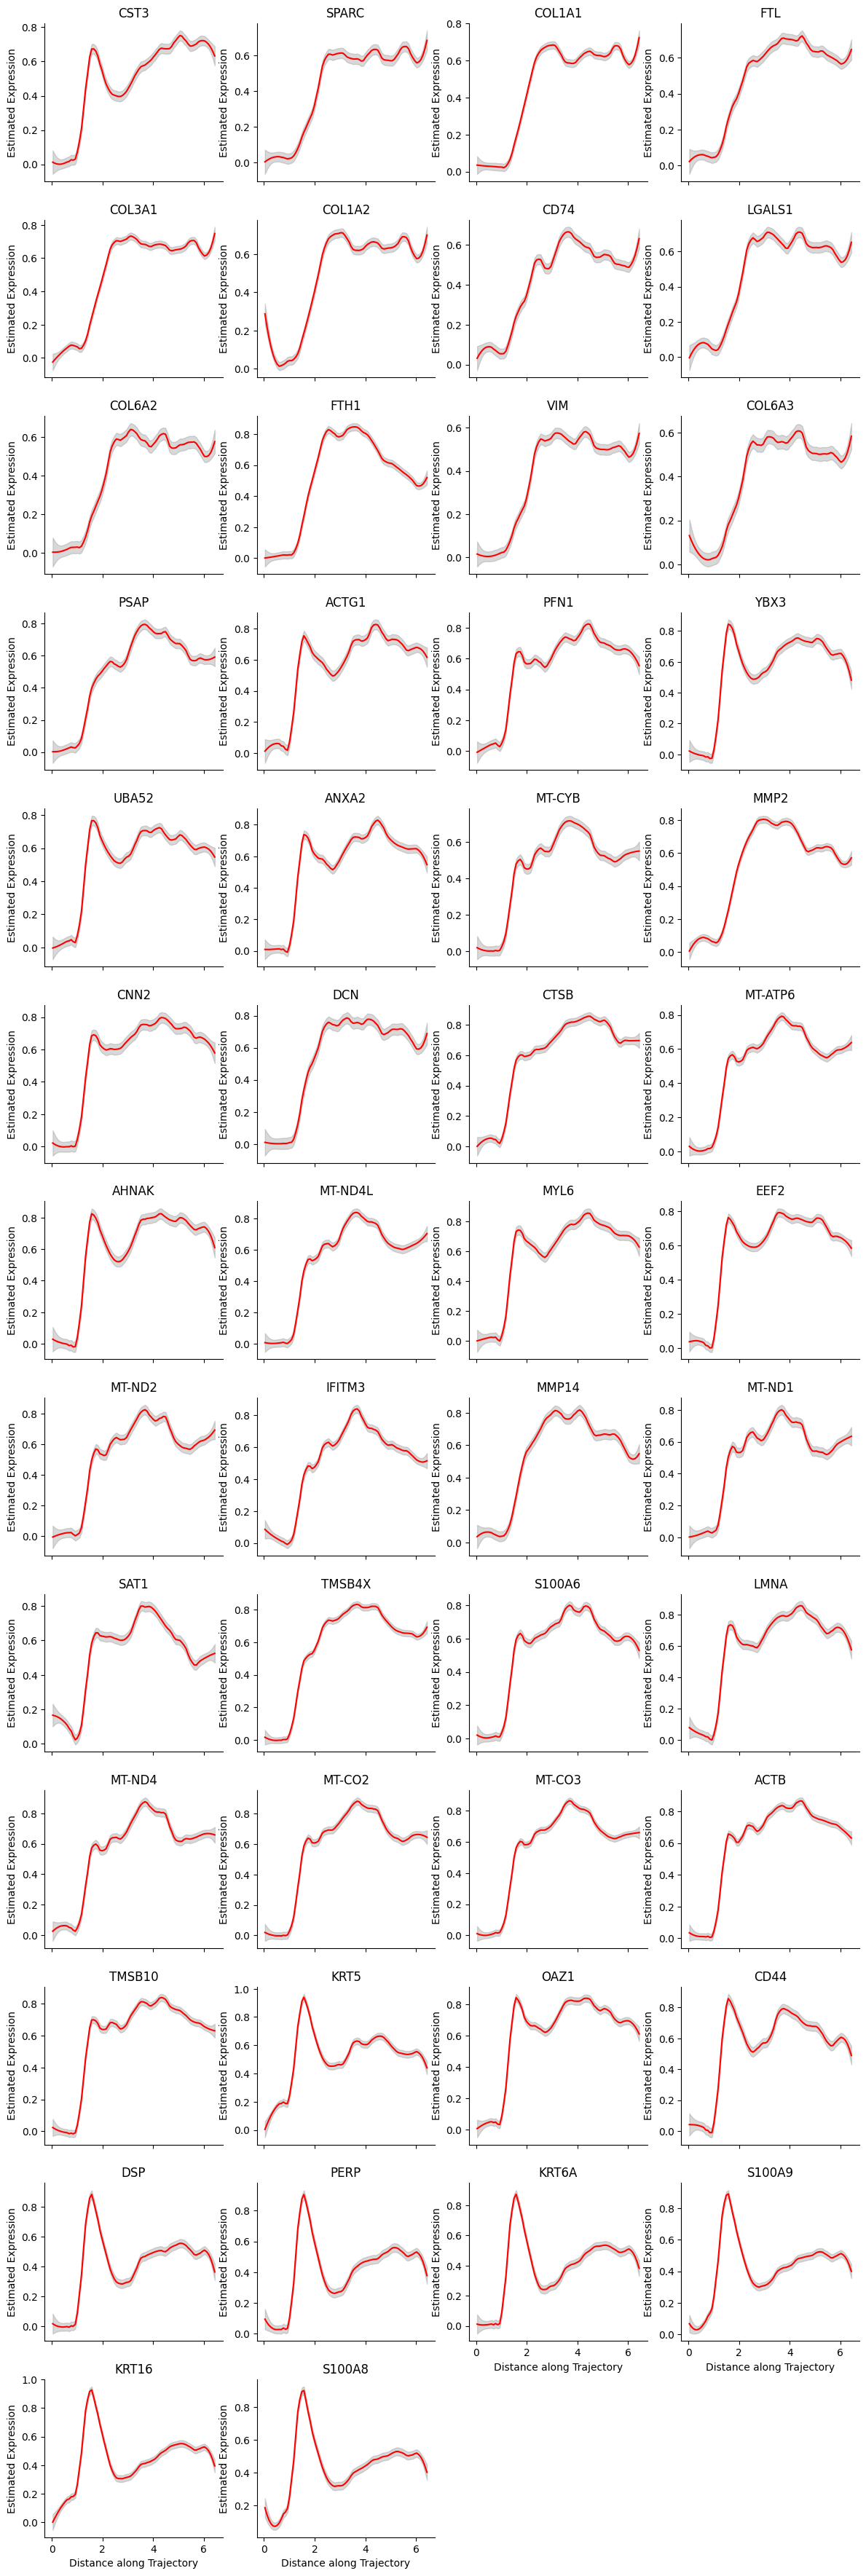

In [22]:
g = sns.FacetGrid(df, col="variables", col_wrap=4, height=3, sharey=False)

g.map_dataframe(sns.lineplot, x="x", y="y", color="red")

# err bands
for ax, variable in zip(g.axes.flat, g.col_names):
    sub = df[df["variables"] == variable]
    ax.fill_between(sub["x"], sub["ymin"], sub["ymax"], color="gray", alpha=0.3)
    ax.set_title(variable)
    ax.set_xlabel("Distance along Trajectory")
    ax.set_ylabel("Estimated Expression")

plt.subplots_adjust(top=0.9)
plt.show()